In [1]:
#some techniques may needed

# 1. concatenate 2 np array
# a=np.array([[1,2]])
# b=np.array([[1,2]])
# print(np.concatenate((a, b), axis=0)) -- print[[1,2],[1,2]]

# 2. table column unique value counts
# print(y_labeled.value_counts())

# 3. np array unique value counts
# unique, counts = np.unique(y_labeled, return_counts=True)
# print(np.asarray((unique, counts)).T) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

dataFramePath='../data_frame/'
processedDataStorePath = '../processed_data/'


## --------------------------
## Get dataset
## --------------------------

In [2]:
df_train = pd.read_csv(dataFramePath+'1tra.csv')
df_test = pd.read_csv(dataFramePath+'1tst.csv')

In [3]:
df_train.head(10)

,@relation banana
0,"@attribute At1 real[-3.09,2.81]"
1,"@attribute At2 real[-2.39,3.19]"
2,"@attribute Class {-1.0,1.0, unlabeled}"
3,"@inputs At1, At2"
4,@outputs Class
5,@data
6,"-0.239, -0.619, -1.0"
7,"1.37, -0.331, 1.0"
8,"-1.74, 0.697, -1.0"
9,"1.15, -1.52, 1.0"


In [5]:
df_test.head(10)

,@relation banana
0,"@attribute At1 real[-3.09,2.81]"
1,"@attribute At2 real[-2.39,3.19]"
2,"@attribute Class {-1.0,1.0}"
3,"@inputs At1, At2"
4,@outputs Class
5,@data
6,"-1.52, -1.15, 1.0"
7,"-0.122, -0.808, -1.0"
8,"1.16, -0.458, 1.0"
9,"1.13, 1.48, -1.0"


In [10]:
# set the column name for the df
column=['x1','x2','label']
startingRow=6

df_temp=pd.DataFrame(columns=column)
    
for i in range(startingRow,len(df_train)-1):
    string = df_train.iloc[i,0]
    valueList = string.split(', ') # NOTICE a space after comma
    newRow={}
    for index, columnName in enumerate(column[:-1]):
        newRow[columnName]=float(valueList[index])
    try:
        newRow[column[-1]]=float(valueList[-1])
    except:
        newRow[column[-1]]=valueList[-1]
    df_temp = df_temp.append(newRow,ignore_index=True)
    
df_train = df_temp

df_temp=pd.DataFrame(columns=column)
    
for i in range(startingRow,len(df_test)-1):
    string = df_test.iloc[i,0]
    valueList = string.split(', ') # NOTICE a space after comma
    newRow={}
    for index, columnName in enumerate(column[:-1]):
        newRow[columnName]=float(valueList[index])
    try:
        newRow[column[-1]]=float(valueList[-1])
    except:
        newRow[column[-1]]=valueList[-1]
    df_temp = df_temp.append(newRow,ignore_index=True)
    
df_test = df_temp

In [11]:
df_train.head()

,x1,x2,label
0,-0.239,-0.619,-1
1,1.370,-0.331,1
2,-1.740,0.697,-1
3,1.150,-1.520,1
4,0.308,-1.340,-1


In [12]:
df_test.head()

,x1,x2,label
0,-1.520,-1.150,1.0
1,-0.122,-0.808,-1.0
2,1.160,-0.458,1.0
3,1.130,1.480,-1.0
4,-0.352,-0.490,1.0


train: 
test: 


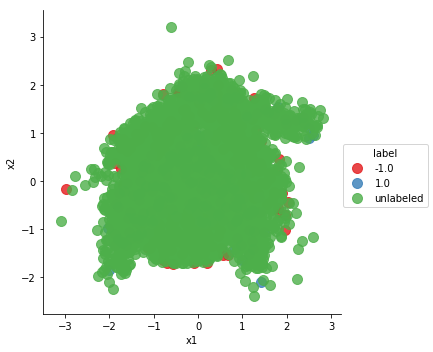

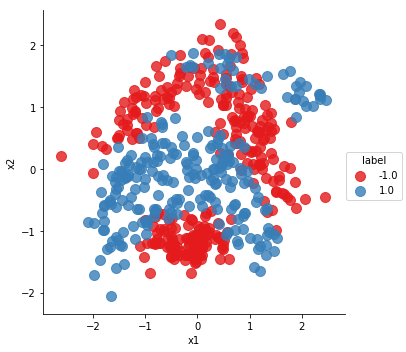

In [13]:
def drawDf(x1,x2,label,df):
    sns.lmplot(x1, x2, data=df, fit_reg=False,  # x-axis, y-axis, data, no line
                   scatter_kws={"s": 100}, # marker size
                   palette='Set1',
                   hue=label)
    
def drawNpArray(x1,x2,y):
    df = pd.DataFrame({'x1':x1,'x2':x2,'label':y})
    drawDf('x1','x2','label',df)
    
print('train: ')
drawDf('x1','x2','label',df_train)
print('test: ')
drawDf('x1','x2','label',df_test)
    

In [10]:
## -------------------------------------
## Make up missing value if needed
## -------------------------------------

## since this dataset contains no missing data, then no need to 
## perform missing value making up

## from sklearn.impute import SimpleImputer
## imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

## -------------------------------------
## Remove outliers
## -------------------------------------

In [16]:
from scipy import stats

print('train: before {} data points'.format(df_train.shape[0]))
df_train=df_train[(np.abs(stats.zscore(df_train[column[:-1]])) < 3).all(axis=1)]
print('train: after {} data points'.format(df_train.shape[0]))
df_train=df_train.reindex([i for i in range(df_train.shape[0])])

print('test: before {} data points'.format(df_test.shape[0]))
df_test=df_test[(np.abs(stats.zscore(df_test[column[:-1]])) < 3).all(axis=1)]
print('test: after {} data points'.format(df_test.shape[0]))
df_test=df_test.reindex([i for i in range(df_test.shape[0])])

train: after 4767 data points
test: before 529 data points
test: after 529 data points


In [18]:
df_train.tail()
# make sure the index is correct

,x1,x2,label
4762,0.412,-0.1240,unlabeled
4763,1.020,0.0975,unlabeled
4764,1.090,0.6140,unlabeled
4765,-0.794,1.0700,unlabeled
4766,1.230,-1.2000,unlabeled


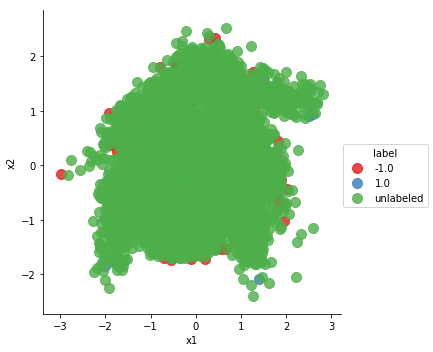

In [20]:
drawDf('x1','x2','label',df_train)

In [22]:
df_train['label'].value_counts()

unlabeled    4288
-1.0          274
1.0           203
Name: label, dtype: int64

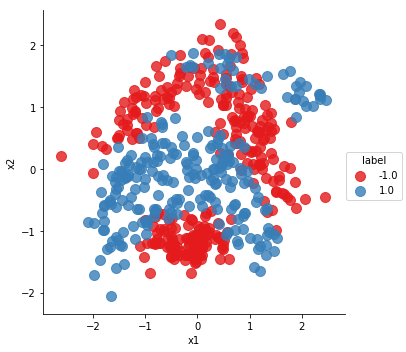

In [23]:
drawDf('x1','x2','label',df_test)

In [24]:
df_test['label'].value_counts()

-1.0    292
 1.0    237
Name: label, dtype: int64

In [20]:
## -------------------------------------
## Normalize
## -------------------------------------

# since the x1 and x2 both vary from -3 to 3, then normalization is not neccessary

# for col in column[:-1]:
#     print(col)
#     col_max = np.max(df3[col])
#     col_min = np.min(df3[col])
#     for index in range(df3.shape[0]):
#         df3.loc[index,col] = (df3.loc[index,col]-col_min)/(col_max-col_min)

## -------------------------------------
## Seperate labeled, unlabeled data and save
## -------------------------------------

In [26]:
X_train_labeled = np.array(df_train[df_train['label']!='unlabeled'][['x1','x2']])
y_train_labeled = np.array(df_train[df_train['label']!='unlabeled']['label'])
X_train_unlabeled = np.array(df_train[df_train['label']=='unlabeled'][['x1','x2']])
y_train_unlabeled = np.array(df_train[df_train['label']=='unlabeled']['label'])
y_train_labeled = np.array([0 if i==-1.0 else 1 for i in y_train_labeled])

X_test = np.array(df_test[['x1','x2']])
y_test = np.array(df_test['label'])
y_test = np.array([0 if i==-1.0 else 1 for i in y_test])

print(len(y_train_labeled),len(y_train_unlabeled),len(y_test))

479 4288 529


In [27]:
# save the data
np.save(processedDataStorePath+'X_train_labeled.npy', X_train_labeled)
np.save(processedDataStorePath+'X_train_unlabeled.npy', X_train_unlabeled)
np.save(processedDataStorePath+'y_train_labeled.npy', y_train_labeled)
np.save(processedDataStorePath+'y_train_unlabeled.npy', y_train_unlabeled)
np.save(processedDataStorePath+'X_test.npy', X_test)
np.save(processedDataStorePath+'y_test.npy', y_test)